## Convolutional Neural Network

*Prepared by:*  
**Jude Michael Teves**  
Faculty, Software Technology Department  
College of Computer Studies - De La Salle University

This notebook is based from the Tensorflow documentation.

## Introduction

A Convolutional Neural Network (CNN) is a type of neural network where at least one layer is a convolutional layer. A typical CNN architecture brings together:
- Convolutional layers: to detect features
- Pooling layers: to reduce spatial size
- Dense layers: for decision-making

**CNNs excel in image recognition, where they’ve set new benchmarks.**

### Convolutional operation

The convolutional operation is a two-step process that applies a filter over a slice of the input matrix:

1. Element-wise multiplication between the filter and a matching section of the input matrix.
2. Summation of all values in the resulting product matrix.

For example, consider the following 5x5 input matrix:

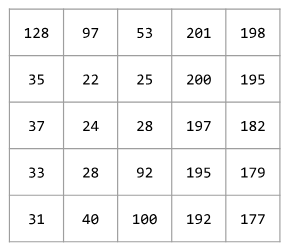

Now consider the following 2x2 convolutional filter:

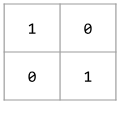

<!-- Each convolutional operation involves a single 2x2 slice of the input matrix. For example, suppose we use the 2x2 slice at the top-left of the input matrix. So, the convolution operation on this slice looks as follows: -->

A convolutional operation would slide the filter over different parts of the input matrix, creating a new matrix that captures patterns from the original data. In this example below, the convolution is applied top-left 2x2 input slice.

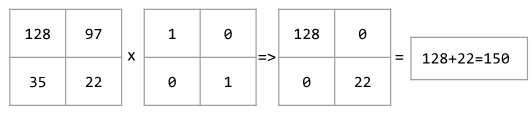

## Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('darkgrid')

sns.set_palette('Set2')
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

### Using Tensorflow

We’ll implement a CNN using TensorFlow and the Keras API, an accessible yet powerful framework for building deep learning models.

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

### Loading the dataset

The CIFAR10 dataset consists of 60,000 colored images across 10 classes (6,000 images per class). It’s already split into 50,000 training images and 10,000 testing images, with no overlap between the classes.

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.

In [18]:
print(train_images.shape, '-', train_labels.shape)
print(test_images.shape, '-', test_labels.shape)

(50000, 32, 32, 3) - (50000, 1)
(10000, 32, 32, 3) - (10000, 1)


### Verifying the data

Let's visualize the first 25 images and display the class names to get a sense of what the dataset looks like. This gives us a quick reality check that our data is loading correctly.

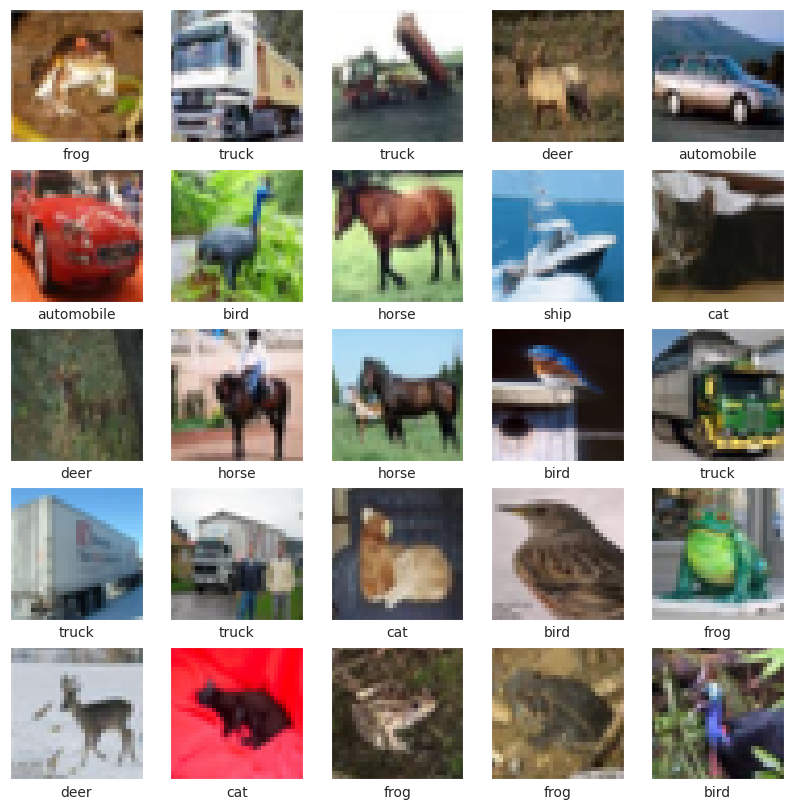

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

## CNN Modeling

### Building the convolutional base

The convolutional base of our model will be a stack of Conv2D and MaxPooling2D layers. These layers will process input tensors of shape (image_height, image_width, RGB color_channels)—for CIFAR, that’s (32, 32, 3).

Each Conv2D and MaxPooling2D layer’s output is a 3D tensor (height, width, channels) with height and width shrinking progressively, while channels (features) increase as we go deeper. This way, the network captures finer details in more channels even as the spatial dimensions reduce.

In [48]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

### Add Dense layers on top

To make final predictions, we’ll take the output from the convolutional base (shape (4, 4, 64)) and flatten it into a 1D vector. This allows us to stack Dense layers, ending with a final layer with 10 outputs—one for each CIFAR class.

The model summary will show that our (4, 4, 64) tensor was unrolled into a vector of size 1024 before passing through the Dense layers.

In [49]:
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 32)                  │          32,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,450 (349.41 KB)

 Trainable params: 89,450 (349.41 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.3511 - loss: 1.7466 - val_accuracy: 0.5656 - val_loss: 1.1998
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 50ms/step - accuracy: 0.5773 - loss: 1.1872 - val_accuracy: 0.6288 - val_loss: 1.0670
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.6476 - loss: 1.0047 - val_accuracy: 0.6564 - val_loss: 0.9791
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.6836 - loss: 0.8982 - val_accuracy: 0.6544 - val_loss: 1.0013
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 131s 46ms/step - accuracy: 0.7108 - loss: 0.8261 - val_accuracy: 0.6921 - val_loss: 0.8976


### Evaluate the model

With this simple CNN, our model reaches around 70% accuracy on test data—a promising result for such a straightforward architecture!

313/313 - 4s - 13ms/step - accuracy: 0.6921 - loss: 0.8976


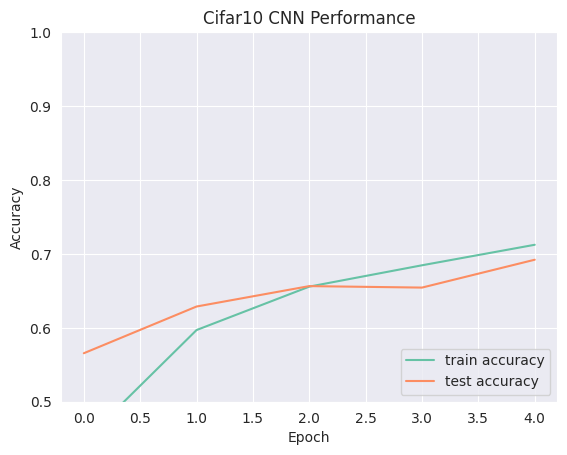

In [55]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label = 'test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Cifar10 CNN Performance')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

## References

1. https://developers.google.com/machine-learning/glossary/#convolutional_neural_network
2. https://www.tensorflow.org/tutorials/images/cnn

## End
<sup>made by **Jude Michael Teves**</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> <href>judemichaelteves@gmail.com</href> or <href>jude.teves@dlsu.edu.ph</href></sup><br>
